https://cambridgespark.com/content/tutorials/deep-learning-for-complete-beginners-recognising-handwritten-digits/index.html

In [1]:
from keras.datasets import mnist # subroutines for fetching the MNIST dataset
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Dense # the two types of neural network layer we will be using
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values

Using TensorFlow backend.


In [2]:
batch_size = 128 # in each iteration, we consider 128 training examples at once
num_epochs = 20 # we iterate twenty times over the entire training set
hidden_size = 512 # there will be 512 neurons in both hidden layers

Now it is time to load and preprocess the MNIST data set. Keras makes this extremely simple, with a fixed interface for fetching and extracting the data from the remote server, directly into NumPy arrays.

To preprocess the input data, we will first flatten the images into 1D (as we will consider each pixel as a separate input feature), and we will then force the pixel intensity values to be in the [0,1][0,1] range by dividing them by 255255. This is a very simple way to "normalise" the data, and I will be discussing other ways in future tutorials in this series.

A good approach to a classification problem is to use probabilistic classification, i.e. to have a single output neuron for each class, outputting a value which corresponds to the probability of the input being of that particular class. This implies a need to transform the training output data into a "one-hot" encoding: for example, if the desired output class is 33, and there are five classes overall (labelled 00 to 44), then an appropriate one-hot encoding is: [0 0 0 1 0][0 0 0 1 0]. Keras, once again, provides us with an out-of-the-box functionality for doing just that.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # fetch MNIST data   ##  https://keras.io/datasets/

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
num_train = 60000 # there are 60000 training examples in MNIST
num_test = 10000 # there are 10000 test examples in MNIST

height, width, depth = 28, 28, 1 # MNIST images are 28x28 and greyscale
num_classes = 10 # there are 10 classes (1 per digit)

In [8]:

X_train = X_train.reshape(num_train, height * width) # Flatten data to 1D
X_test = X_test.reshape(num_test, height * width) # Flatten data to 1D
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255 # Normalise data to [0, 1] range
X_test /= 255 # Normalise data to [0, 1] range

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

An excellent feature of Keras, that sets it apart from frameworks such as TensorFlow, is automatic inference of shapes; we only need to specify the shape of the input layer, and afterwards Keras will take care of initialising the weight variables with proper shapes. Once all the layers have been defined, we simply need to identify the input(s) and the output(s) in order to define our model, as illustrated below.

In [9]:
inp = Input(shape=(height * width,)) # Our input is a 1D vector of size 784
hidden_1 = Dense(hidden_size, activation='relu')(inp) # First hidden ReLU layer
hidden_2 = Dense(hidden_size, activation='relu')(hidden_1) # Second hidden ReLU layer
out = Dense(num_classes, activation='softmax')(hidden_2) # Output softmax layer

model = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers

In [10]:
model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

Finally, we call the training algorithm with the determined batch size and epoch count. It is good practice to set aside a fraction of the training data to be used just for verification that our algorithm is (still) properly generalising (this is commonly referred to as the validation set); here we will hold out 10%10% of the data for this purpose.

An excellent out-of-the-box feature of Keras is verbosity; it's able to provide detailed real-time pretty-printing of the training algorithm's progress.

In [11]:
history = model.fit(X_train, Y_train, # Train the model using the training set...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 11s - loss: 0.2297 - acc: 0.9332 - val_loss: 0.0992 - val_acc: 0.9697
Epoch 2/20
54000/54000 [==============================] - 11s - loss: 0.0838 - acc: 0.9736 - val_loss: 0.0726 - val_acc: 0.9787
Epoch 3/20
54000/54000 [==============================] - 10s - loss: 0.0533 - acc: 0.9830 - val_loss: 0.0661 - val_acc: 0.9803
Epoch 4/20
54000/54000 [==============================] - 9s - loss: 0.0357 - acc: 0.9887 - val_loss: 0.0731 - val_acc: 0.9792
Epoch 5/20
54000/54000 [==============================] - 9s - loss: 0.0284 - acc: 0.9907 - val_loss: 0.0939 - val_acc: 0.9750
Epoch 6/20
54000/54000 [==============================] - 10s - loss: 0.0232 - acc: 0.9922 - val_loss: 0.0715 - val_acc: 0.9812
Epoch 7/20
54000/54000 [==============================] - 10s - loss: 0.0173 - acc: 0.9943 - val_loss: 0.0923 - val_acc: 0.9767
Epoch 8/20
54000/54000 [==============================] -

In [12]:
history.params

{'batch_size': 128,
 'do_validation': True,
 'epochs': 20,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'samples': 54000,
 'verbose': 1}

In [13]:
history.history

{'acc': [0.93320370366838246,
  0.97362962966495092,
  0.98298148148148146,
  0.9887407407407407,
  0.9907407407407407,
  0.99220370365072175,
  0.99429629624331439,
  0.99361111111111111,
  0.99487037031738845,
  0.9952037037037037,
  0.99555555555555553,
  0.99742592592592594,
  0.99657407407407406,
  0.99592592592592588,
  0.99727777777777782,
  0.99759259259259259,
  0.99698148148148147,
  0.99659259259259259,
  0.99837037037037035,
  0.99842592592592594],
 'loss': [0.22969011269233844,
  0.083814107696215306,
  0.053340408792374311,
  0.035700464509565523,
  0.028415165638206182,
  0.023194558339262449,
  0.01734717335689951,
  0.018903483948842795,
  0.01483916344748879,
  0.014136188557164536,
  0.01362741678175344,
  0.0079974225247192582,
  0.011173214733333292,
  0.012002236604112787,
  0.0078907485657578533,
  0.0078138771694610584,
  0.0092543915426401696,
  0.0099837583741086908,
  0.0045775625572401892,
  0.0050460583646576938],
 'val_acc': [0.96966666634877519,
  0.97866

In [14]:
score = model.evaluate(X_test, Y_test, verbose=1) # Evaluate the trained model on the test set!
print('score::',score)

 9664/10000 [===========================>..] - ETA: 0sscore:: [0.08414624073373507, 0.98160000000000003]


In [15]:
print('Test score:', score[0])
print('Test accuracy:',score[1])

Test score: 0.0841462407337
Test accuracy: 0.9816


Now lets predict one single sample

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


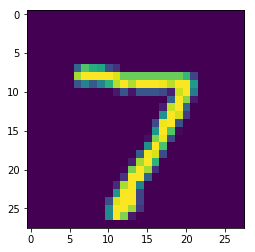

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
X_test_0 = X_test[0,:].reshape(1,height * width)
Y_test_0 = Y_test[0,:]
print(Y_test_0)
plt.imshow(X_test_0.reshape(28,28))

In [19]:
import numpy as np
pred = model.predict(X_test_0)
print('Label of testing sample:', np.argmax(Y_test_0))
print('\nOutput of the softmax layer:',pred[0])
print('\nNeural Network prediction:', np.argmax(pred[0]))

Label of testing sample: 7

Output of the softmax layer: [  4.46629025e-17   3.17146461e-12   8.96795767e-13   2.02302577e-10
   2.23746927e-19   1.15318482e-17   3.32788719e-18   1.00000000e+00
   8.63590125e-18   4.20364004e-12]

Neural Network prediction: 7
